In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def perceptron_func(x1, x2):
    return -4.79 * x1 + 5.90 * x2 - 0.93

In [4]:
def sigmoid_func(x):
    return 1 / (1 + torch.exp(-x))

In [5]:
def hardlim_func(x):
    return torch.where(x >= 0, torch.tensor(1.0), torch.tensor(0.0))

In [6]:
def rbf_func(x):
    return torch.exp(-x ** 2)

In [34]:
num_points_100 = 100  # Set to 100 points along each axis
num_points_5000 = 5000  # Set to 5000 points along each axis
num_points_10000 = 10000  # Set to 10000 points along each axis

In [45]:
# Create a function to generate the input domain, calculate the perceptron output,
# apply activation functions and plot the results
def plot_perceptron_surface(num_points):
    # Define the domain
    x1 = np.linspace(-2, 2, num_points)
    x2 = np.linspace(-2, 2, num_points)
    X1, X2 = np.meshgrid(x1, x2)

    # Convert the NumPy arrays to PyTorch tensors
    X1_torch = torch.tensor(X1, dtype=torch.float32)
    X2_torch = torch.tensor(X2, dtype=torch.float32)

    # Calculate the perceptron output using PyTorch
    Z_torch = perceptron_func(X1_torch, X2_torch)

    # Apply the activation functions and convert the results back to NumPy arrays for plotting
    Z_sigmoid = sigmoid_func(Z_torch).numpy()
    Z_hardlim = hardlim_func(Z_torch).numpy()
    Z_rbf = rbf_func(Z_torch).numpy()

    # Plotting the output surface for each activation function
    fig, axs = plt.subplots(3, 1, figsize=(8, 18), subplot_kw={'projection': '3d'})

    # Sigmoid Activation Function
    axs[0].plot_surface(X1, X2, Z_sigmoid, cmap='viridis')
    axs[0].set_title(f'Sigmoid Activation Function - {num_points} Sample Points')
    axs[0].set_xlabel('x1')
    axs[0].set_ylabel('x2')
    axs[0].set_zlabel('y')

    # Hard Limit Activation Function
    axs[1].plot_surface(X1, X2, Z_hardlim, cmap='viridis')
    axs[1].set_title(f'Hard Limit Activation Function - {num_points} Sample Points')
    axs[1].set_xlabel('x1')
    axs[1].set_ylabel('x2')
    axs[1].set_zlabel('y')

    # Radial Basis Function (RBF)
    axs[2].plot_surface(X1, X2, Z_rbf, cmap='viridis')
    axs[2].set_title(f'Radial Basis Function (RBF) - {num_points} Sample Points')
    axs[2].set_xlabel('x1')
    axs[2].set_ylabel('x2')
    axs[2].set_zlabel('y')

    plt.tight_layout()
    plt.show()


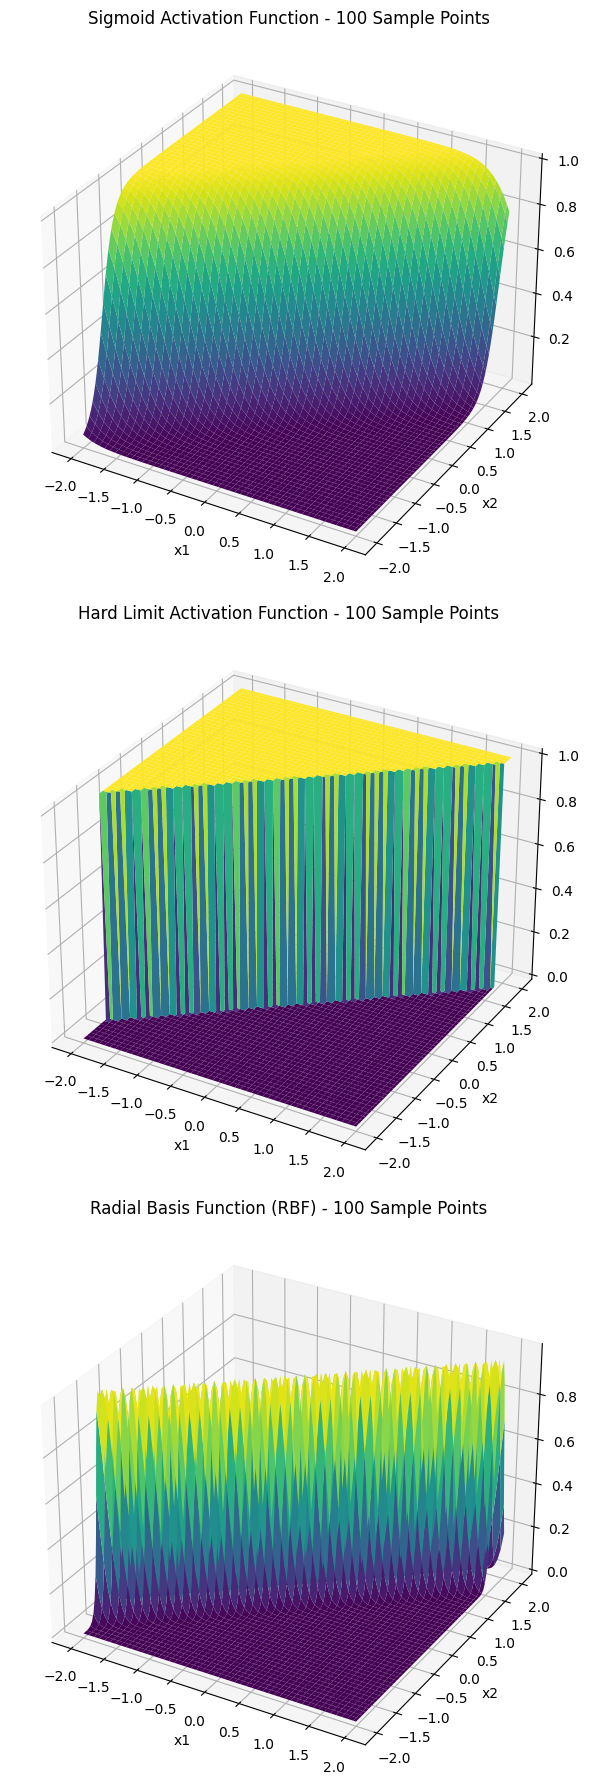

In [46]:
plot_perceptron_surface(num_points_100)

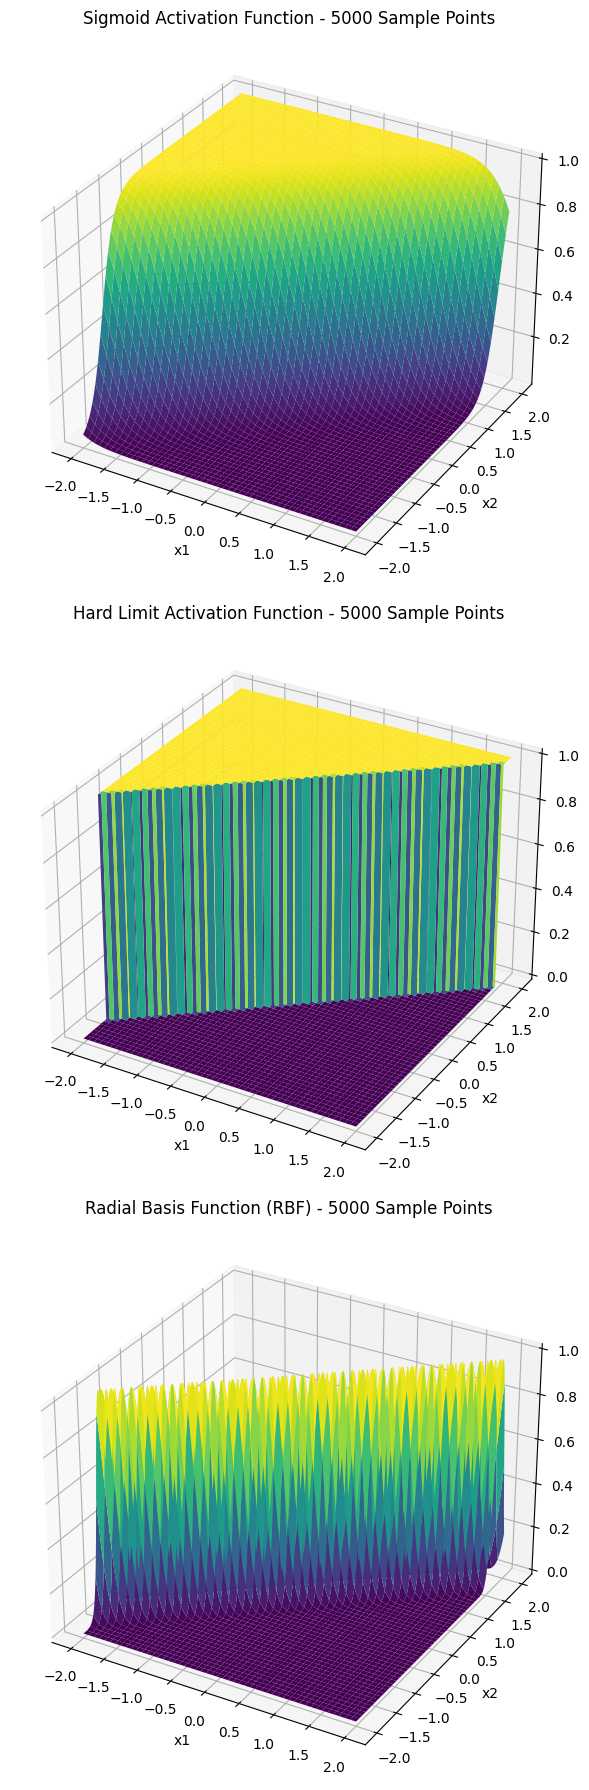

In [47]:
plot_perceptron_surface(num_points_5000)

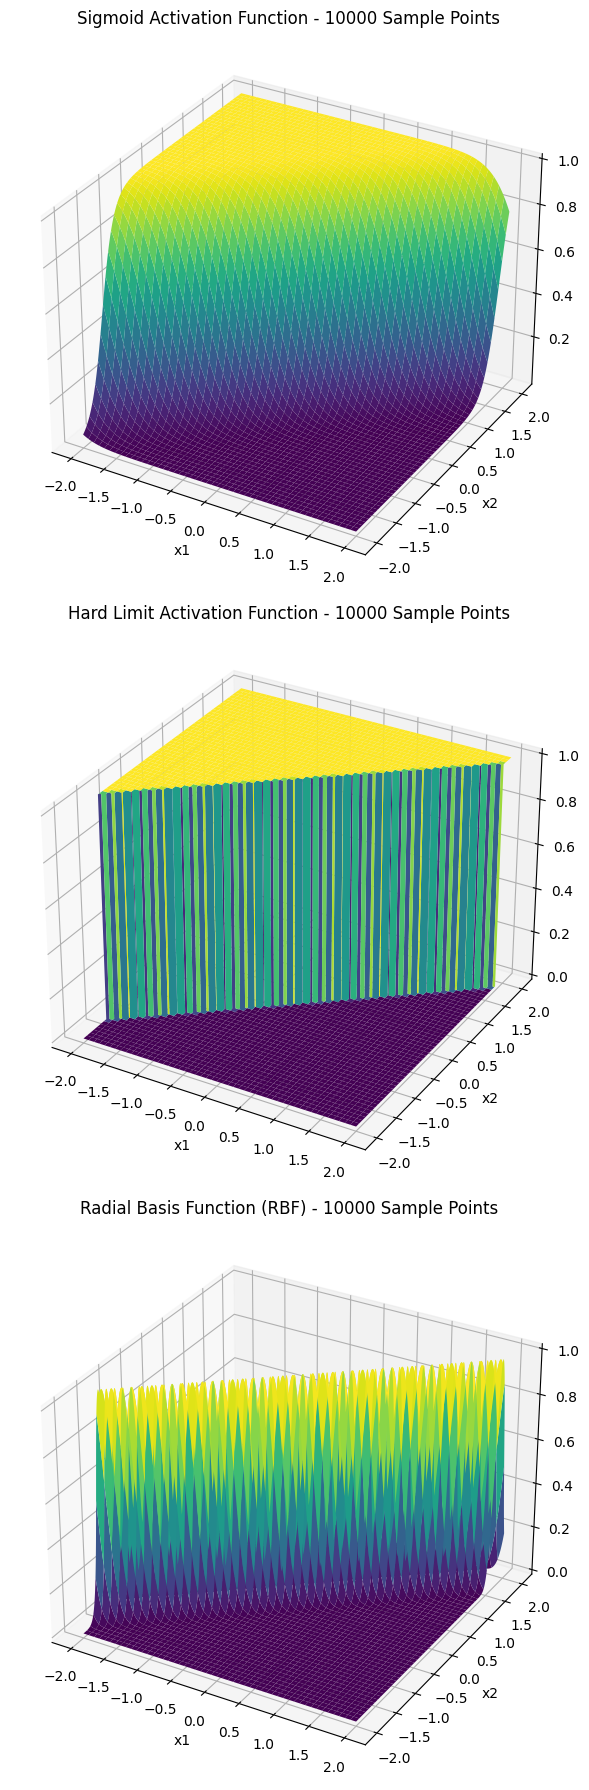

In [48]:
plot_perceptron_surface(num_points_10000)